In [1]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 导入数据，生成相应的输入数据和输出数据集
from sklearn import datasets

iris = datasets.load_iris()
# 全部行，保留后两个特征，总共4个特征
X = iris.data[:, 2:]
y = iris.target

In [3]:
# 查看数据集的具体信息
iris.keys()   
# dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# 查看样本信息
Z = iris.data
Z.shape

(150, 4)

In [5]:
# 查看输出实例信息
y = iris.target
y.shape

(150,)

In [6]:
# 查看输出的具体信息
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

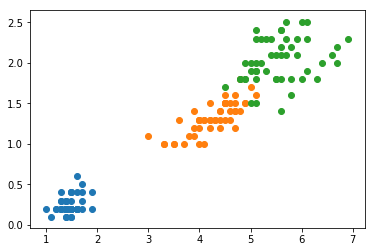

In [7]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

### 调用sklearn

In [8]:
# 导入决策树包
from sklearn.tree import DecisionTreeClassifier

# 创建实例，传入两个参数：树的最大深入和特征判断的标准即信息熵
dt_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
# 拟合过程，返回拟合结果
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [9]:
# 模型的决策边界创建
def plot_decision_boundary(model, axis):
    # meshgrid，linspace，reshape
    x0, x1 = np.meshgrid(
    np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape((70,10)), 
    np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape((30,10))
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    z = y_predict.reshape(x0.shape)
    
    # 自定义图形的颜色元素
    from matplotlib.colors import ListedColormap
    custom_camp = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, z, linewidth=5, cmap=custom_camp)

c:\users\admin\venv\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


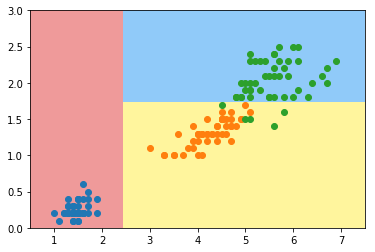

In [10]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

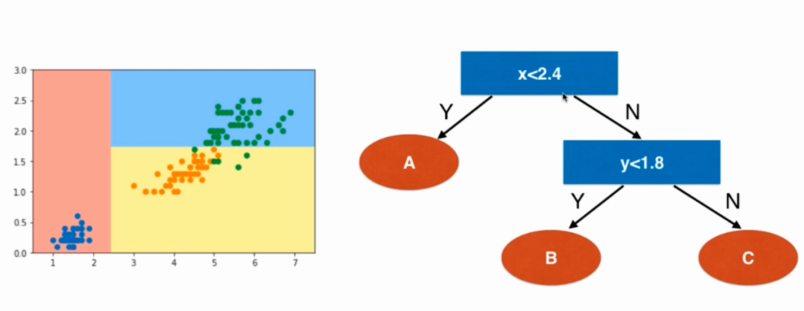

### 信息熵
>熵来自于热力学系统，熵越大，粒子运动越剧烈，不规则性越大；反之亦然。在信息论中代表不确定的度量
- 信息熵越大，不确定性越大
- 信息熵越小，不确定性越小

计算公式：$$H=-\sum _{i=1}^{k}p_ilog(p_i)$$

二分类问题：$$H(p)=-plog_2p-(1-p)log_2(1-p)$$

In [11]:
def entropy(p):
    return -p * np.log(p) - (1-p) * np.log(1-p)

In [12]:
x = np.linspace(0.01, 0.99, 200)

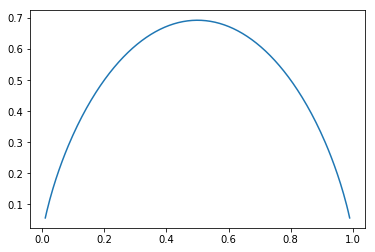

In [13]:
plt.plot(x, entropy(x))
plt.show()

### 结果
当样本的分类中只有两个类别，且当它们的占比都为0.5时
- 占比为0.5时，不确定性最高，即熵最大
- 当x变大或者变小的时候，更加偏向于某个类，确定性都会提高，信息熵都会变小
- 当每个类别是等概率的时，不确定性最高

### 使用信息熵寻找最优划分

In [14]:
# d：节点维度，value：阈值
def split(X, y, d, value):
    # 左、右两边阈值
    index_a = (X[:,d] <= value)
    index_b = (X[:,d] > value)
    # 返回的是分成的两类数据
    return X[index_a], X[index_b], y[index_a], y[index_b]

In [15]:
from collections import Counter
from math import log

def entropy(y):
    counter = Counter(y)
    res = 0.0
    for num in counter.values():
        p = num / len(y)
        res += -p * log(p)
    return res

def try_split(X, y):
    # 目的是为了找出信息熵更小的值，找出更好的则更新best_entropy
    best_entropy = float("inf")
    best_d, best_v = -1, -1
    # 对X的维度进行穷搜遍历
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:, d])
        for i in range(1, len(X)):
            if X[sorted_index[i-1], d] != X[sorted_index[i], d]:
                v = (X[sorted_index[i-1], d] + X[sorted_index[i], d]) / 2
                x_l, x_r, y_l, y_r = split(X, y, d, v)
                e = entropy(y_l) + entropy(y_r)
                if e < best_entropy:
                    best_entropy, best_d, best_v = e, d, v
    return best_entropy, best_d, best_v

In [16]:
best_entropy, best_d, best_v = try_split(X, y)
print("best_entropy = ", best_entropy)
print("best_d = ", best_d)
print("best_v = ", best_v)

best_entropy =  0.6931471805599453
best_d =  0
best_v =  2.45


In [17]:
X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)

In [18]:
entropy(y1_l)

0.0

In [19]:
entropy(y1_r)

0.6931471805599453

In [20]:
best_entropy2, best_d2, best_v2 = try_split(X1_r, y1_r)
print("best_entropy = ", best_entropy2)
print("best_d = ", best_d2)
print("best_v = ", best_v2)

best_entropy =  0.4132278899361904
best_d =  1
best_v =  1.75


In [21]:
X2_l, X2_r, y2_l, y2_r = split(X1_r, y1_r, best_d2, best_v2)

In [22]:
entropy(y2_r)

0.10473243910508653

In [23]:
entropy(y2_l)

0.30849545083110386

### 基尼系数
计算公式：$$G=1-\sum_{i=1}^{k}p_i^2$$
>在sklearn中默认使用的是基尼系数进行决策树的划分

In [24]:
from collections import Counter
from math import log

# d：节点维度，value：阈值
def split(X, y, d, value):
    # 左、右两边阈值
    index_a = (X[:,d] <= value)
    index_b = (X[:,d] > value)
    # 返回的是分成的两类数据
    return X[index_a], X[index_b], y[index_a], y[index_b]

def gini(y):
    # 变成字典形式
    counter = Counter(y)
    res = 1.0
    for num in counter.values():
        p = num / len(y)
        # 公式中用1-p**2， 不断地遍历
        res += -p ** 2
    return res

def try_split(X, y):
    # 目的是为了找出基尼系数更小的值，找出更好的则更新best_g
    best_g = float("inf")
    best_d, best_v = -1, -1
    # 对X的每个特征进行遍历
    for d in range(X.shape[1]):
        # 每个特征维度上进行排序
        sorted_index = np.argsort(X[:, d])
        # 对每个样本进行遍历
        for i in range(1, len(X)):
            # 在维度d上，相邻两个样本的值不等，二者均值为搜索的v
            if X[sorted_index[i-1], d] != X[sorted_index[i], d]:
                v = (X[sorted_index[i-1], d] + X[sorted_index[i], d]) / 2
                # 利用当前的d，v进行split方法
                x_l, x_r, y_l, y_r = split(X, y, d, v)
                e = gini(y_l) + gini(y_r)
                if e < best_g:
                    best_g, best_d, best_v = e, d, v
    return best_g, best_d, best_v

In [25]:
best_g, best_d, best_v = try_split(X, y)
print("best_entropy = ", best_g)
print("best_d = ", best_d)
print("best_v = ", best_v)

best_entropy =  0.5
best_d =  0
best_v =  2.45


In [26]:
X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)

In [27]:
gini(y1_l)

0.0

In [28]:
gini(y1_r)

0.5

In [29]:
best_g2, best_d2, best_v2 = try_split(X1_r, y1_r)
print("best_entropy = ", best_g2)
print("best_d = ", best_d2)
print("best_v = ", best_v2)

best_entropy =  0.2105714900645938
best_d =  1
best_v =  1.75


In [30]:
X2_l, X2_r, y2_l, y2_r = split(X1_r, y1_r, best_d2, best_v2)

In [31]:
gini(y2_l)

0.1680384087791495

In [32]:
gini(y2_r)

0.04253308128544431

### CART和超参数
`Classification And Regression Tree` 是`sklearn`中的默认方式
- 预测:O(logm)
- 训练：O(n*m*logm)

>剪枝的作用是：降低复杂度和防止过拟合

In [33]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
# 使用的虚拟数据
X, y = datasets.make_moons(noise=0.15, random_state=666)

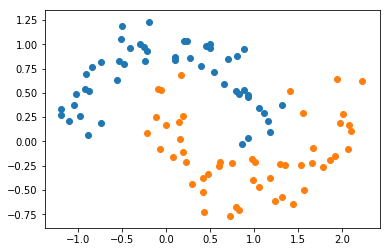

In [34]:
# X[y==0, 0]：找出当y取值为0时，X的第一个值（索引为0）
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [35]:
X[:5]

array([[ 1.40708812e+00,  5.18309965e-01],
       [-5.59473796e-04,  1.68271832e-01],
       [-5.38661008e-01,  8.29216107e-01],
       [-8.37707688e-01,  7.71443908e-01],
       [-8.78193138e-01,  5.19389300e-01]])

In [36]:
# X[y==0, 0]：找出当y取值为0时，X的第一个特征值（索引为0）
X[y==0, 0]

array([-0.53866101, -0.83770769, -0.87819314,  0.93145706,  0.45205023,
        0.65884933, -0.40861168,  0.86085154, -0.92567666, -0.19417371,
        0.39105155,  0.88835277,  1.05870159, -0.50002529,  0.88581888,
        0.49512567, -0.24681745,  0.92569222, -0.73877455,  1.11139704,
        0.26891105,  1.32067951, -1.04781532,  0.54087553, -1.09823311,
        0.10670176, -0.48008284,  0.50108242, -0.73633426,  0.10551856,
        0.9267746 , -0.50649937, -1.02007206,  1.17554769, -0.21329553,
       -1.19163065, -0.88919528,  0.205713  ,  0.83045816,  0.23981396,
        0.79408646, -0.90916823, -0.9804237 ,  0.69799038,  0.80083016,
       -0.24413409, -0.55403445, -0.29314209, -1.19437002,  1.15744408])

In [37]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X ,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [38]:
# 模型的决策边界创建
def plot_decision_boundary(model, axis):
    # meshgrid，linspace，reshape
    x0, x1 = np.meshgrid(
    np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape((40,10)), 
    np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape((10,25))
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    z = y_predict.reshape(x0.shape)
    
    # 自定义图形的颜色元素
    from matplotlib.colors import ListedColormap
    custom_camp = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, z, linewidth=5, cmap=custom_camp)

c:\users\admin\venv\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


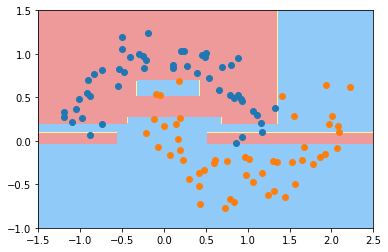

In [39]:
plot_decision_boundary(dt_clf, axis=[-1.5, 2.5, -1.0, 1.5])

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

###  超参数
能够用网格搜索进行调参

c:\users\admin\venv\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


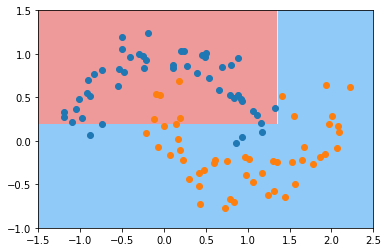

In [40]:
# 传入参数max_depth=2
dt_clf = DecisionTreeClassifier(max_depth=2)
dt_clf.fit(X ,y)

plot_decision_boundary(dt_clf, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

c:\users\admin\venv\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


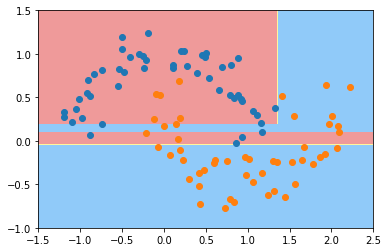

In [41]:
# min_samples_split：节点至少需要多少数据才能进行拆分
dt_clf = DecisionTreeClassifier(min_samples_split=10)
dt_clf.fit(X ,y)

plot_decision_boundary(dt_clf, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

c:\users\admin\venv\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


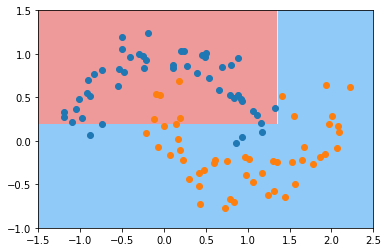

In [42]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes=3)
dt_clf.fit(X ,y)

plot_decision_boundary(dt_clf, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

### 决策树应用于回归问题：波士顿房价

In [43]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [44]:
from sklearn.model_selection import train_test_split

# 进行数据的分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [45]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [46]:
# 在测试数据集上的准确率不高
dt_reg.score(X_test, y_test)

0.5811711239830463

In [47]:
# 训练数据集上100%准确，在测试数据集上不好，说明出现过拟合现象
dt_reg.score(X_train, y_train)

1.0

In [48]:
# 调参过程
dt_reg1 = DecisionTreeRegressor(max_depth=6)
dt_reg1.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [49]:
# 在测试数据集上的准确率不高
dt_reg1.score(X_test, y_test)

0.5946811009685471

### 决策树网格调参

In [50]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [72]:
# 利用网格搜索进行调参，一定要注意每个参数的起始值
para_grid = [
    {
        "max_depth": [i for i in range(1, 10)],
        "max_leaf_nodes": [i for i in range(2, 10)],
        "min_samples_split": [i for i in range(2,10)],
        "max_features": [i for i in range(1, 10)]
    }
]

In [73]:
# 导入调参的包，传入实例和设置的参数
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(dt_reg, para_grid)

In [74]:
%%time
grid_search.fit(X_train, y_train)

c:\users\admin\venv\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 35.2 s


c:\users\admin\venv\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9]